In [14]:
import numpy as np
from fireballpy import Fireball
from ase import Atoms
from ase.visualize import view
from ase.optimize import BFGS
from ase.geometry import distance
import matplotlib.pyplot as plt

atoms = Atoms(symbols=['C', 'H', 'H', 'H', 'H'],
            positions=[( 0.0000, 0.0000, 0.0000),
                       ( -1.6533, -1.6533, -1.6533),
                       (-0.6533, 0.6533, 0.6533),
                       ( 0.6533, -0.6533, 0.6533),
                       ( 0.6533, 0.6533, -0.6533)])

In [15]:
atoms.calc = Fireball(fdata='HCSi', charges_method='mulliken_dipole_preserving')
opt = BFGS(atoms, trajectory='BFGS.traj', logfile='opt.log')
opt.run(fmax=0.05)

np.True_

In [16]:
print("steps :",opt.get_number_of_steps())

steps : 17


In [17]:
from ase.io.trajectory import Trajectory
traj = Trajectory('BFGS.traj')

In [18]:
ETOT=[]
F=[]
time=[]
for i in range(opt.get_number_of_steps()+1):
    ETOT.append(traj[i].get_total_energy())
    time.append(i)
    f=traj[i].get_forces()
    m=np.sum(np.linalg.norm(f, axis=1))
    F.append(m)

Text(0, 0.5, 'Energy (eV)')

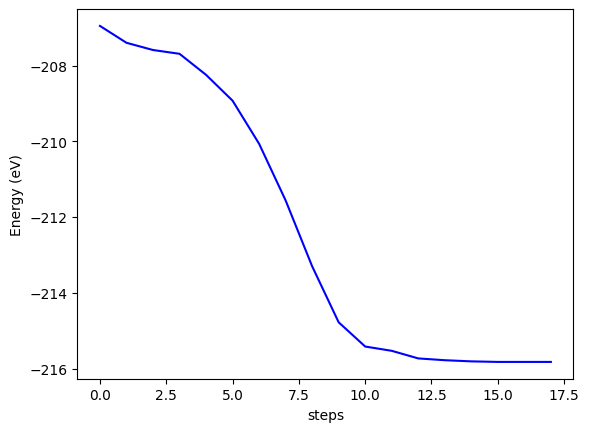

In [19]:
plt.plot(time, ETOT, label='ETOT', color='b')
plt.xlabel('steps')
plt.ylabel('Energy (eV)')

Text(0, 0.5, 'suma_atom(sqrt(fi^2))')

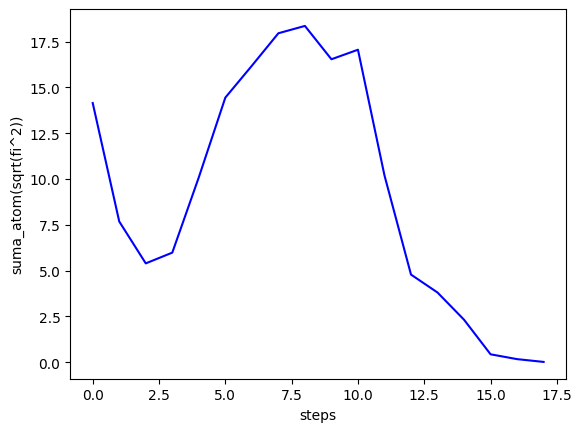

In [20]:
plt.plot(time, F, label='F', color='b')
plt.xlabel('steps')
plt.ylabel('suma_atom(sqrt(fi^2))')

In [21]:
frame = traj[0]

index_atom1 = 0
index_atom2 = 1

pos_atom1 = frame[index_atom1].position
pos_atom2 = frame[index_atom2].position

distance = np.linalg.norm(pos_atom1 - pos_atom2)
print(f"Distancia entre los átomos {index_atom1} y {index_atom2}: {distance} Å")

Distancia entre los átomos 0 y 1: 2.863599600153625 Å


In [22]:
distances = []

index_atom1 = 0
index_atom2 = 1

for index_atom2 in [1,2,3,4]:
    aux=[]
    for frame in traj:
        pos_atom1 = frame[index_atom1].position
        pos_atom2 = frame[index_atom2].position
        d = np.linalg.norm(pos_atom1 - pos_atom2)
        aux.append(d)
    distances.append(aux)

Text(0, 0.5, 'Energy (eV)')

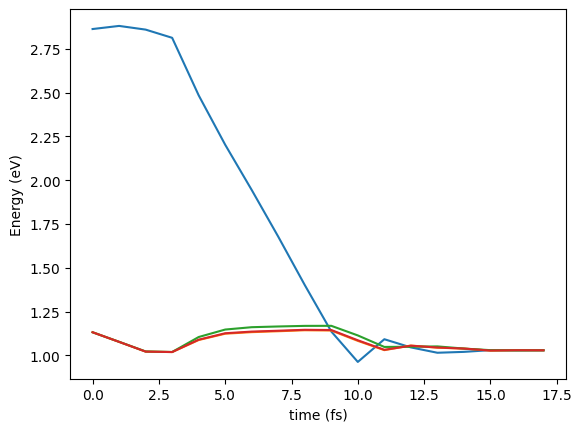

In [23]:
for d in distances:
    plt.plot(time, d)
plt.xlabel('time (fs)')
plt.ylabel('Energy (eV)')

In [24]:
view(traj[0], viewer='x3d')

In [25]:
view(traj[-1], viewer='x3d')